In [2]:
import pandas as pd
df = pd.read_csv('new_data.csv')
df

,Gender,Age,MeterBefore,KgBefore,MinBefore,Medicine1,Medicine2,Medicine3,MeterAfter,KgAfter,MinAfter,SideEffects,DistanceDiff,WeightDiff,SpeedBefore,SpeedAfter,WeightLoss,ImprovedSpeed,WeightGain
0,F,32,4060.0,74.7,41.2,No,No,No,4370.0,91.8,61.1,N,310.0,17.1,98.54,71.52,0,0,1
1,F,26,5170.0,75.4,59.6,No,No,No,5810.0,89.1,60.9,N,640.0,13.7,86.74,95.40,0,1,1
2,M,37,5310.0,93.9,50.6,No,Yes,Yes,5670.0,87.8,67.9,N,360.0,-6.1,104.94,83.51,1,0,0
3,F,44,3930.0,87.6,36.8,No,Yes,No,4300.0,92.4,59.2,N,370.0,4.8,106.79,72.64,0,0,1
4,F,31,3730.0,71.8,61.2,No,Yes,No,3790.0,94.8,60.5,N,60.0,23.0,60.95,62.64,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,M,27,4850.0,87.1,45.0,Yes,Yes,No,4390.0,88.7,64.4,N,-460.0,1.6,107.78,68.17,0,0,1
344,M,40,3750.0,80.2,47.7,No,Yes,No,4110.0,94.0,55.1,N,360.0,13.8,78.62,74.59,0,0,1
345,M,28,5020.0,97.1,48.5,No,Yes,No,4210.0,86.5,60.2,N,-810.0,-10.6,103.51,69.93,1,0,0
346,M,39,5690.0,77.5,39.3,No,No,Yes,5410.0,85.8,61.0,Y,-280.0,8.3,144.78,88.69,0,0,1


In [3]:
#input attributes and target classifier
inputs = df[['Gender', 'Age', 'Medicine1', 'Medicine2', 'Medicine3', 'SideEffects', 'WeightDiff', 'DistanceDiff']]
target = df['ImprovedSpeed']

## Convert the attribute values to numbers

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
inputs['Medicine1'] = le.fit_transform(inputs['Medicine1'])
inputs['Medicine2'] = le.fit_transform(inputs['Medicine2'])
inputs['Medicine3'] = le.fit_transform(inputs['Medicine3'])
inputs['Gender'] = le.fit_transform(inputs['Gender'])
inputs['SideEffects'] = le.fit_transform(inputs['SideEffects'])
inputs

/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_923/3287342615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Medicine1'] = le.fit_transform(inputs['Medicine1'])
/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_923/3287342615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Medicine2'] = le.fit_transform(inputs['Medicine2'])
/var/folders/82/s5dmzykj59x6mr41xc11x5nr0000gn/T/ipykernel_923/3287342615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

,Gender,Age,Medicine1,Medicine2,Medicine3,SideEffects,WeightDiff,DistanceDiff
0,0,32,0,0,0,0,17.1,310.0
1,0,26,0,0,0,0,13.7,640.0
2,1,37,0,1,1,0,-6.1,360.0
3,0,44,0,1,0,0,4.8,370.0
4,0,31,0,1,0,0,23.0,60.0
...,...,...,...,...,...,...,...,...
343,1,27,1,1,0,0,1.6,-460.0
344,1,40,0,1,0,0,13.8,360.0
345,1,28,0,1,0,0,-10.6,-810.0
346,1,39,0,0,1,1,8.3,-280.0


## Training Data and Testing Data Split

In [5]:
#split training data and testing data
from sklearn.model_selection import train_test_split
x = inputs.copy()
y = target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 

## Building the decision tree

In [6]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4)
#get the decision tree from training data
model = model.fit(x_train, y_train)

In [7]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
#accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8620689655172413

In [9]:
#confusion matrix of the model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0, 1])

array([[73,  4],
       [ 8,  2]])

In [10]:
#full classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['No Improvement', 'Improvement']))

                precision    recall  f1-score   support

No Improvement       0.90      0.95      0.92        77
   Improvement       0.33      0.20      0.25        10

      accuracy                           0.86        87
     macro avg       0.62      0.57      0.59        87
  weighted avg       0.84      0.86      0.85        87



## Visualizeing the decision tree

In [11]:
feature_names = x.columns
feature_names

Index(['Gender', 'Age', 'Medicine1', 'Medicine2', 'Medicine3', 'SideEffects',
       'WeightDiff', 'DistanceDiff'],
      dtype='object')

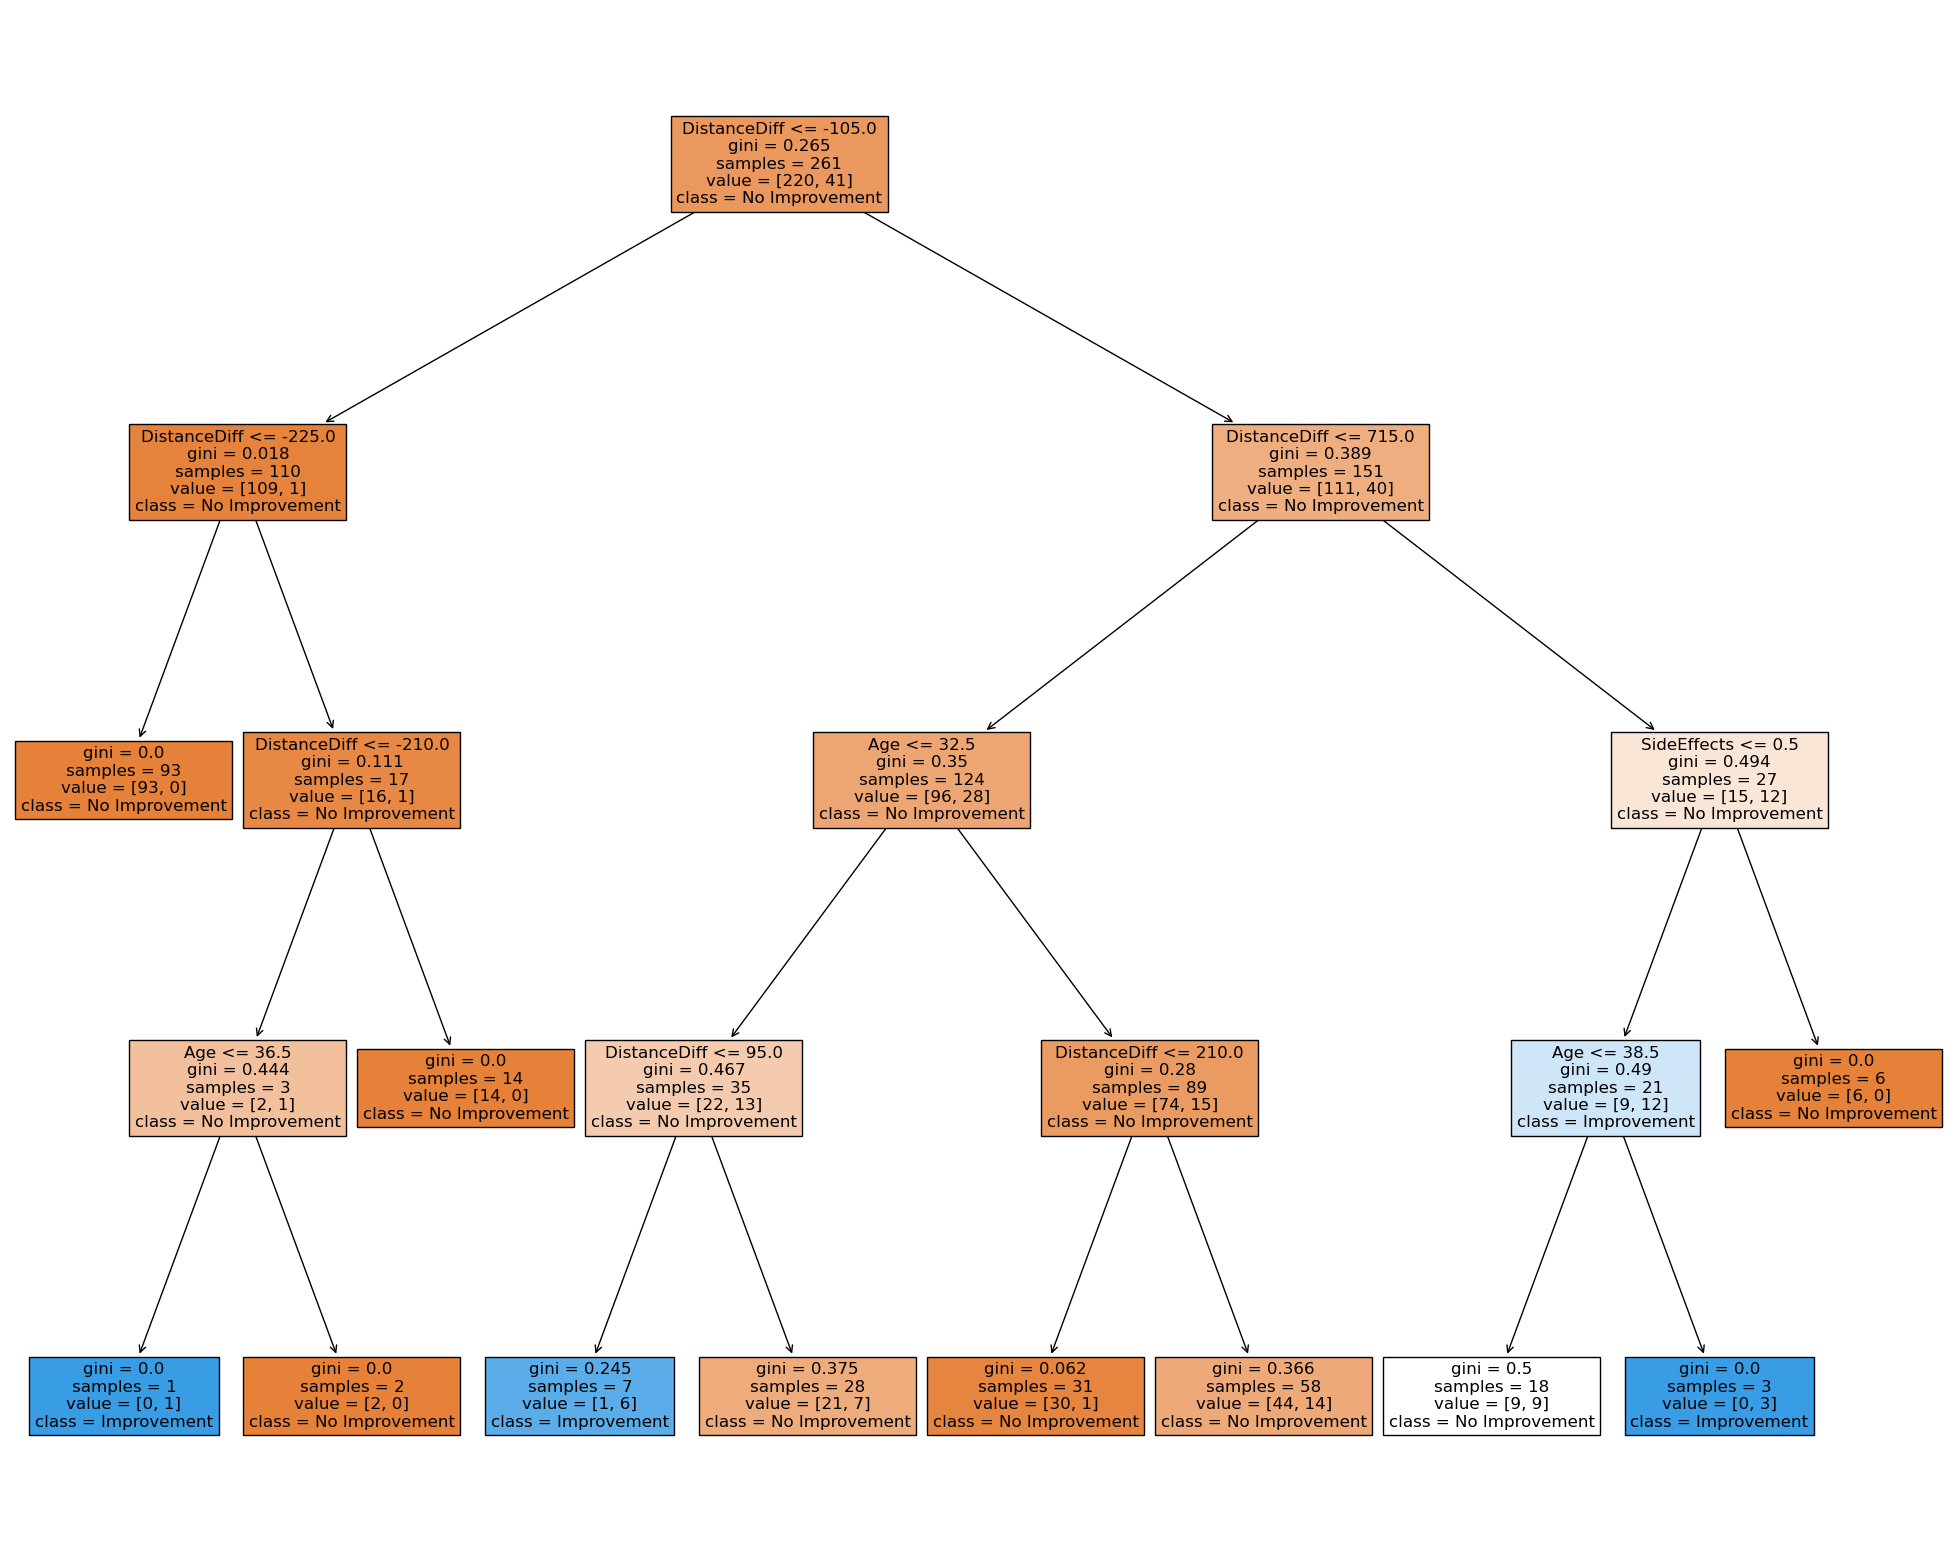

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25, 20))
_=tree.plot_tree(model,
                feature_names=feature_names,
                class_names={0:'No Improvement', 1:'Improvement'},
                filled=True,
                fontsize=12)